In [5]:
import numpy as np
import torch
import torchvision
import math
import numpy as np
import cv2
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
# Purpose: This code uses a pre-trained object detection model (SSDLite320_MobileNet_V3_Large) to detect cars in a video,
# estimate their speed, and issue speeding tickets if the speed exceeds a specified limit.

# Load the pre-trained model
model = torchvision.models.detection.ssdlite320_mobilenet_v3_large(weights='SSDLite320_MobileNet_V3_Large_Weights.COCO_V1')
model.eval()

# Set the confidence threshold for object detection
confidence_threshold = 0.5

# Set the frame rate and pixels per meter (ppm) for speed estimation
frame_rate = 12.5
ppm = 8.8

# Set the speed limit and fine amount for speeding tickets
speed_limit = 50  # km/h
fine_amount = 25  # $

# Function to estimate the speed of an object given its pixel locations and frame rate
def estimate_speed(location1, location2, ppm, fps):
    d_pixels = math.sqrt((location2[0] - location1[0]) ** 2 + (location2[1] - location1[1]) ** 2)
    d_meter = d_pixels / ppm
    speed = d_meter * fps * 3.6 * 100 # Convert to km/h
    return speed

# Function to detect cars in a frame, estimate their speed, and issue speeding tickets
def detect_cars(frame, frame_rate, ppm):
    global pos_list_prev

    # Convert the frame to a tensor
    img_tensor = torchvision.transforms.ToTensor()(frame)

    # Use the pre-trained model for object detection
    with torch.no_grad():
        predictions = model([img_tensor])

    # Loop through the detected objects
    for pred, score in zip(predictions[0]["boxes"], predictions[0]["scores"]):
        x1, y1, x2, y2 = map(int, pred)
        if score >= confidence_threshold:
            # Draw a bounding box around the detected car
            cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)

            # Calculate the centroid of the bounding box
            centroid_x = (x1 + x2) / 2
            centroid_y = (y1 + y2) / 2
            pos_list = [centroid_x, centroid_y]

            # Estimate the speed if the previous position is available
            if pos_list_prev is not None:
                speed = estimate_speed(pos_list_prev, pos_list, ppm, frame_rate)
                if speed >= speed_limit:
                    issue_speeding_ticket(speed)
                    print("Speeding Ticket Issued")
            else:
                speed = 0

            # Display the estimated speed on the frame
            cv2.putText(frame, f'Speed: {speed:.2f} km/h', (x1, y1 + 20), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1)

            # Update the previous position
            pos_list_prev = pos_list

    return frame

# Function to issue a speeding ticket and save the details in a text file
def issue_speeding_ticket(speed):
    filename = "Speeding_Ticket.txt"
    with open(filename, "a") as file:
        file.write("Speeding Ticket!\n")
        file.write(f"Detected Speed: {speed:.2f} km/h\n")
        file.write(f"Fine Amount: ${fine_amount}\n")
        file.write("\n")

# Open the video file

drive.mount('/content/drive')

path = "content/drive/My Drive/Colab Notebooks/car.mp4"
cap = cv2.VideoCapture(path)

if not cap.isOpened():
    print('Error: unable to load the video')


# Initialize the previous position list
pos_list_prev = None

# Set the maximum number of frames to process
max_frames = 10  # Limit the number of frames to process

# Process the video frames
frame_count = 0
while cap.isOpened() and frame_count < max_frames:
    ret, frame = cap.read()
    if not ret:
        break

    # Detect cars, estimate their speed, and issue speeding tickets
    processed_frame = detect_cars(frame, frame_rate, ppm)

    # Convert the frame to RGB (OpenCV uses BGR by default)
    frame_rgb = cv2.cvtColor(processed_frame, cv2.COLOR_BGR2RGB)

    # Display the frame using matplotlib
    plt.imshow(frame_rgb)
    plt.axis('off')  # Hide axis
    display(plt.gcf())
    clear_output(wait=True)

    frame_count += 1

# Release the video capture object
cap.release()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Error: unable to load the video


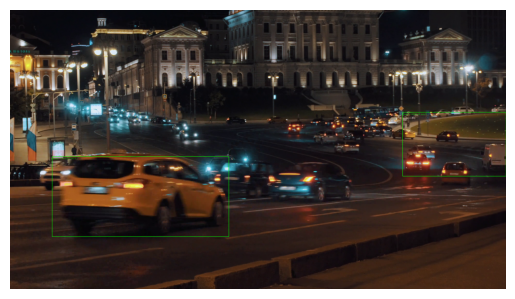

In [8]:
# prompt: fix the above error

import numpy as np
import torch
import torchvision
import math
import cv2
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
import numpy as np
import torch
import torchvision
import math
import cv2
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
from google.colab import drive

# Purpose: This code uses a pre-trained object detection model (SSDLite320_MobileNet_V3_Large) to detect cars in a video,
# estimate their speed, and issue speeding tickets if the speed exceeds a specified limit.

# Load the pre-trained model
try:
    model = torchvision.models.detection.ssdlite320_mobilenet_v3_large(weights='SSDLite320_MobileNet_V3_Large_Weights.COCO_V1')
    model.eval()
except Exception as e:
    print(f"Error loading the model: {e}")
    print("Please ensure the correct weights are available or the model is correctly specified.")
    exit()





# Mount Google Drive
drive.mount('/content/drive')

# Purpose: This code uses a pre-trained object detection model (SSDLite320_MobileNet_V3_Large) to detect cars in a video,
# estimate their speed, and issue speeding tickets if the speed exceeds a specified limit.

# Load the pre-trained model
try:
    model = torchvision.models.detection.ssdlite320_mobilenet_v3_large(weights='SSDLite320_MobileNet_V3_Large_Weights.COCO_V1')
    model.eval()
except Exception as e:
    print(f"Error loading the model: {e}")
    print("Please ensure the correct weights are available or the model is correctly specified.")
    exit()

# ... (rest of your code)




# Set the confidence threshold for object detection
confidence_threshold = 0.5

# Set the frame rate and pixels per meter (ppm) for speed estimation
frame_rate = 12.5
ppm = 8.8

# Set the speed limit and fine amount for speeding tickets
speed_limit = 50  # km/h
fine_amount = 25  # $

# Function to estimate the speed of an object given its pixel locations and frame rate
def estimate_speed(location1, location2, ppm, fps):
    d_pixels = math.sqrt((location2[0] - location1[0]) ** 2 + (location2[1] - location1[1]) ** 2)
    d_meter = d_pixels / ppm
    speed = d_meter * fps * 3.6  # Convert to km/h
    return speed

# Function to detect cars in a frame, estimate their speed, and issue speeding tickets
def detect_cars(frame, frame_rate, ppm):
    global pos_list_prev

    # Convert the frame to a tensor
    img_tensor = torchvision.transforms.ToTensor()(frame)

    # Use the pre-trained model for object detection
    with torch.no_grad():
        predictions = model([img_tensor])

    # Loop through the detected objects
    for i in range(len(predictions[0]["boxes"])):
        pred = predictions[0]["boxes"][i]
        score = predictions[0]["scores"][i]
        x1, y1, x2, y2 = map(int, pred)
        if score >= confidence_threshold:
            # Draw a bounding box around the detected car
            cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)

            # Calculate the centroid of the bounding box
            centroid_x = (x1 + x2) / 2
            centroid_y = (y1 + y2) / 2
            pos_list = [centroid_x, centroid_y]

            # Estimate the speed if the previous position is available
            if pos_list_prev is not None:
                speed = estimate_speed(pos_list_prev, pos_list, ppm, frame_rate)
                if speed >= speed_limit:
                    issue_speeding_ticket(speed)
                    print("Speeding Ticket Issued")
            else:
                speed = 0

            # Display the estimated speed on the frame
            cv2.putText(frame, f'Speed: {speed:.2f} km/h', (x1, y1 + 20), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1)

            # Update the previous position
            pos_list_prev = pos_list

    return frame

# Function to issue a speeding ticket and save the details in a text file
def issue_speeding_ticket(speed):
    filename = "Speeding_Ticket.txt"
    print("Speeding Ticket Issued")
    with open(filename, "a") as file:
        file.write("Speeding Ticket!\n")
        file.write(f"Detected Speed: {speed:.2f} km/h\n")
        file.write(f"Fine Amount: ${fine_amount}\n")
        file.write("\n")

# Open the video file
# Ensure the path is correct

# Open the video file
# Ensure the path is correct and the file exists.  Double-check for typos.
path = "/content/drive/My Drive/Colab Notebooks/car.mp4"  # Use the full path
cap = cv2.VideoCapture(path)

if not cap.isOpened():
    print(f'Error: unable to load the video at {path}')
    print("Please verify the file path.")
    exit()


# Initialize the previous position list
pos_list_prev = None

# Set the maximum number of frames to process (optional)
max_frames = 10

# Process the video frames
frame_count = 0
while cap.isOpened() and frame_count < max_frames:
    ret, frame = cap.read()
    if not ret:
        break

    # Detect cars, estimate their speed, and issue speeding tickets
    processed_frame = detect_cars(frame, frame_rate, ppm)

    # Convert the frame to RGB (OpenCV uses BGR by default)
    frame_rgb = cv2.cvtColor(processed_frame, cv2.COLOR_BGR2RGB)

    # Display the frame using matplotlib
    plt.imshow(frame_rgb)
    plt.axis('off')  # Hide axis
    display(plt.gcf())
    clear_output(wait=True)

    frame_count += 1

# Release the video capture object
cap.release()